# CVMFS Plublication statistics

This notebook contains the statistics gathered on the host *cvmfs-lhcbdev-test* (lxcvmfs94.cern.ch) in June 2019.
The test consisted on using https://gitlab.cern.ch/bcouturi/lbcvmfsdevusecase to generate 100 MiB transactions in files of various sizes (actually the file size is random following a gaussian distribution with sigma=10 bytes in this test).
We show below the publication time for a 100MiB transaction, which were measured AFTER the removal of the throttling system on the CEPH S3 interface.

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy as np

In [60]:
file_size = [ 1000, 4000, 10000, 20000, 40000, 100000]
publish_time = [ 152, 39.62109955423477, 16.464788732394368, 12, 8.724545454545455, 8.014090909090909]
publish_variance = [256.80, 17.485685098705158, 2.2808853118712262, 0.6, 0.9727487701021127, 1.366331597006904]


Text(0, 0.5, 'time in s')

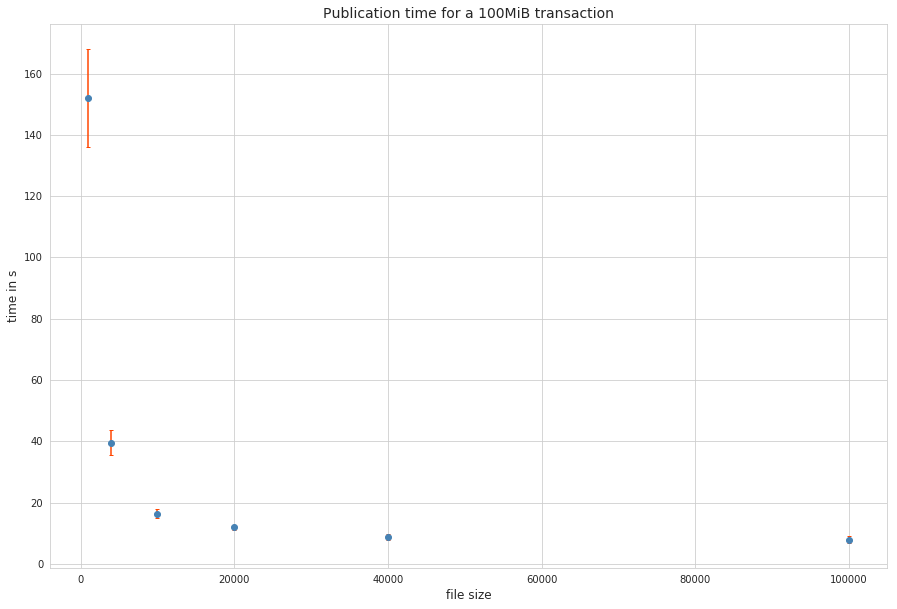

In [21]:
# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the error bars
ax.errorbar(file_size, publish_time, yerr=np.sqrt(publish_variance), fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)

# Adding plotting parameters
ax.set_title('Publication time for a 100MiB transaction', fontsize=14)
ax.set_xlabel('file size', fontsize=12)
ax.set_ylabel('time in s', fontsize=12)


Text(0, 0.5, 'time in s')

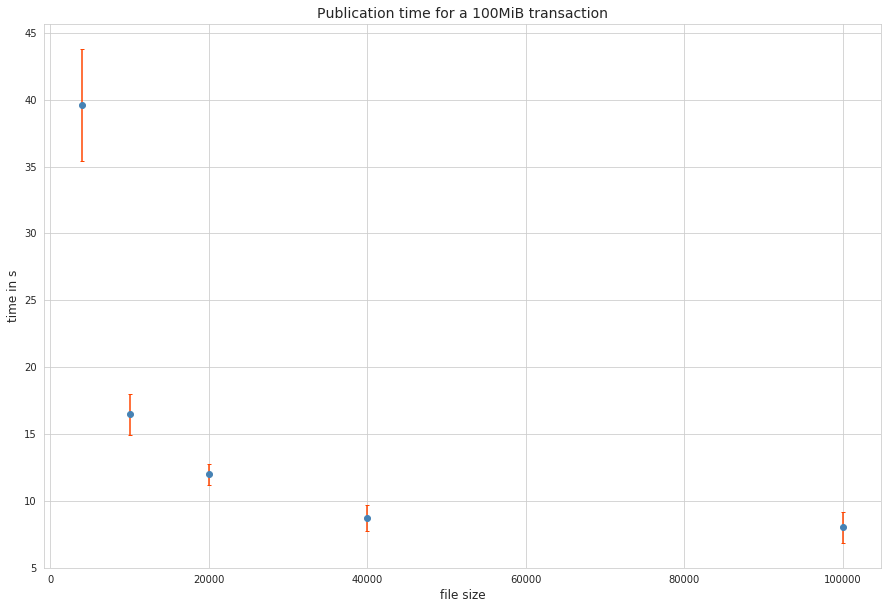

In [61]:
# A subplot without tiny files

fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the error bars
ax.errorbar(file_size[1:], publish_time[1:], yerr=np.sqrt(publish_variance[1:]), fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)

# Adding plotting parameters
ax.set_title('Publication time for a 100MiB transaction', fontsize=14)
ax.set_xlabel('file size', fontsize=12)
ax.set_ylabel('time in s', fontsize=12)
#ax.set_xscale('log')
#ax.set_yscale('log')



# LHCb Nightly slot statistics

In order to check how we will fare with the LHCb nightly build releases, we gather some statistics of the *lhcb-gaudi-head* nightly slot, one of the largest that should be representative.

In [32]:
import os
toppath="/cvmfs/lhcbdev.cern.ch/nightlies/lhcb-gaudi-head"
filesizes=[]
for dirName, subdirList, fileList in os.walk(toppath):
    for f in fileList:
        filesizes.append(os.stat(os.path.join(dirName, f)).st_size)
        


In [62]:
print("Number of files in the slot (for 10 days): %s" % len(filesizes))

Number of files in the slot (for 10 days): 4469911


In [63]:
s = np.array(filesizes)
sk = s/1024.0 # Size in KiB

In [64]:
import scipy.stats
scipy.stats.describe(sk)

DescribeResult(nobs=4469911, minmax=(0.0, 380700.74609375), mean=50.37434631799366, variance=2433780.3167775557, skewness=90.93110468286028, kurtosis=13237.212808150032)

In [65]:
print("The median is %s KiB" % np.median(sk))

The median is 0.0400390625 KiB


In [78]:
hist, bin_edges = np.histogram(sk, bins=np.arange(0,100) )

In [79]:
fig2, ax2 = plt.subplots(figsize=(15, 10))
plt.bar(bin_edges[1:], hist/len(filesizes), log=True)
plt.show()

In [92]:
fig3, ax3 = plt.subplots(figsize=(15, 10))
n, bins, patches = ax3.hist(s, bins=np.arange(0,5000, 100), density=True, histtype='step',cumulative=True, label='Empirical')
ax.set_title('Cumulative histogram of file sizes in bytes', fontsize=14)
ax.set_xlabel('file size in bytes', fontsize=12)

Text(0.5, 20.200000000000003, 'file size in bytes')